In [1]:
import acquire, prepare, csv, json, os
from env import github_token, github_username
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, \
                                            CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=13)

In [3]:
# acquire.acquire_repo_list('gasoline')
# acquire.acquire_repo_list('solar energy')
# acquire.acquire_repo_list('wind power')

In [4]:
# df = acquire.scrape_github_data()

In [5]:
# len(df)

In [6]:
# df

In [7]:
# full_list = []
# for file in os.listdir():
#     if 'repos.json' in file:
#         full_list.append(file)
# item_list = []
# for item in full_list:
#     lm = pd.read_json(item)
#     item_list += (list(lm[0]))
# REPOS = item_list
# len(REPOS)

In [8]:
# REPOS

In [9]:
# frame = [acquire.process_repo(repo) for repo in REPOS]

In [10]:
# len(frame)

In [11]:
# frame

In [12]:
# pd.DataFrame(frame).to_csv('new_repos_dict.csv', index=False)

In [13]:
# pd.read_json('data.json')

In [14]:
# url = 'https://github.com/search?o=desc&p=1&q=petroleum&s=stars&type=Repositories'
# headers = {'User-Agent': 'manual search'} 
# response = get(url, headers=headers)
# # print(response.status_code)
# soup = BeautifulSoup(response.content, 'html.parser')

In [15]:
# soup.find_all('a', class_='v-align-middle')[0].text

In [16]:
# def get_repo_names(url):
#     headers = {'User-Agent': 'manual search'} 
#     response = get(url, headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     repos = []
#     for i in range(10):
#         repos.append(soup.find_all('a', class_='v-align-middle')\
#                  [i].text)
#         time.sleep(.8)
#     return repos

In [17]:
# url = 'https://github.com/search?o=desc&p=1&q=petroleum&s=stars&type=Repositories'
# get_repo_names(url)

In [18]:
# urls = [f'https://github.com/search?o=desc&p={i}\
# &q=petroleum+size%3A>100&s=stars&type=Repositories' \
# for i in range(1,11)]
# urls[0]

In [19]:
# if not os.path.isfile(f'{category}.json'):
#     lol.to_csv('data.csv')
# data = pd.read_csv('data.csv', header=None, index_col=0,
#                   names=['number','repo'])

In [20]:
# def acquire_repo_list(category):
#     if (' ') in category:
#         category = category.replace(' ','_')
#         f_category = category.replace(' ','+')

#     urls = [f'https://github.com/search?o=desc&p={i}\
#     &q={f_category}+size:>100&s=stars&type=Repositories'\
#     for i in range(1,11)]

#     test = []
#     for url in urls:
#         test += get_repo_names(url)
        
#     if not os.path.isfile(f'{category}.json'):  
#         json.dump(test, open(f"{category}_repos.json", "w"),
#                   indent=1)
    
#     return test

In [21]:
# solar = acquire_repo_list('solar energy')

In [22]:
# len(solar)

In [23]:
# lm = pd.read_json('solar_energy_repo.json')
# list(lm[0])

In [24]:
# gas = acquire_repo_list('natural gas')

In [25]:
# len(gas)

In [26]:
# full_list = []
# for file in os.listdir():
#     if 'repo.json' in file:
#         full_list.append(file)
# full_list

In [27]:
# for i, item in enumerate(full_list):
#     locals()['lm'+str(i)] = pd.read_json(item)
# repo_list = []
# for i in range(len(full_list)):
#     repo_list.append(list('lm'+str(i))[0])
# repo_list

In [28]:
# item_list = []
# for item in full_list:
#     lm = pd.read_json(item)
#     item_list += (list(lm[0]))

In [29]:
# item_list

In [30]:
# lm = pd.read_json('natural_gas_repo.json')
# lm2 = pd.read_json('solar_energy_repo.json')
# len(list(lm[0]) + list(lm2[0]))

In [31]:
# test = []
# for url in urls:
#     test += get_repo_names(url)

# len(test)

In [32]:
# test

In [33]:
# lol = pd.Series(test)
# test[:6]

In [34]:
# if not os.path.isfile('data.csv'):
#     lol.to_csv('data.csv')
# data = pd.read_csv('data.csv', header=None, index_col=0,
#                   names=['number','repo'])

In [35]:
# data_list = list(data.repo)

In [36]:
# repo = 'gocodeup/codeup-setup-script'

In [37]:
# acquire.scrape_github_data()

In [38]:
# pd.read_json('solar_energy_repo.json')

In [39]:
# rrrrrr

In [40]:
# REPOS

In [41]:
df = pd.read_csv('new_repos_dict.csv')

df['category'] = 'unknown'

df.loc[:200, 'category'] = 'gasoline'
df.loc[200:400, 'category'] = 'wind_energy'
df.loc[400:, 'category'] = 'solar_power'
df = df[['language','category','repo','readme_contents']]
df.head()

,language,category,repo,readme_contents
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....


In [42]:
df[df.readme_contents.isna()]

,language,category,repo,readme_contents
33,NaN,gasoline,femoru/GasolineApp,NaN
368,Jupyter Notebook,wind_energy,zoeyzou/power-the-wind,NaN


In [43]:
df[df.language.isna()].category.value_counts()

wind_energy    16
solar_power    15
gasoline       12
Name: category, dtype: int64

In [44]:
df = prepare.prep_repo_data(df)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [45]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...


In [46]:
df.shape

(410, 7)

In [47]:
df.clean_lemmatized.apply(len).nlargest(15)

135    84881
269    84881
114    81494
388    81123
17     64273
234    31806
270    16389
130    11005
297    10445
14      9942
330     7553
320     7272
192     6802
264     6776
292     6537
Name: clean_lemmatized, dtype: int64

In [48]:
df = df[df.index!=135]
df = df[df.index!=269]

In [49]:
df.shape

(408, 7)

In [50]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

In [51]:
df = df.replace('Matlab','MATLAB')

In [52]:
df.shape

(408, 8)

In [53]:
df.language.value_counts()

Jupyter Notebook     67
JavaScript           57
Python               52
PowerShell           36
HTML                 30
Java                 22
C++                  19
C                    18
R                    14
PHP                  14
MATLAB               13
CSS                  10
C#                    9
TypeScript            6
Ruby                  5
Arduino               3
Swift                 3
Processing            2
Batchfile             2
TeX                   2
Objective-C           2
Eagle                 2
Go                    2
Dart                  2
Visual Basic          1
Fortran               1
Vue                   1
Lua                   1
Modelica              1
M                     1
Scala                 1
Visual Basic .NET     1
TSQL                  1
CMake                 1
PostScript            1
OCaml                 1
ActionScript          1
Perl                  1
Cuda                  1
Makefile              1
Name: language, dtype: int64

In [54]:
low = df.language.value_counts() < 10

In [55]:
low_lang = [low.index[i] for i, x in enumerate(low) if x]

In [56]:
df = df[~df.language.isin(low_lang)]

In [57]:
df.language.value_counts()

Jupyter Notebook    67
JavaScript          57
Python              52
PowerShell          36
HTML                30
Java                22
C++                 19
C                   18
PHP                 14
R                   14
MATLAB              13
CSS                 10
Name: language, dtype: int64

In [58]:
top_4_lang = list(df.language.value_counts().head(4).index)
top_4_lang_df = df[df.language.isin(top_4_lang)]

In [59]:
top_4_lang_df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,61
7,Jupyter Notebook,gasoline,madsenmj/ml-gas-price,# Gas Price Prediction Model\n\nThis project u...,"[gas, price, prediction, model, this, project,...",ga price predict model thi project use public ...,gas price prediction model project us public d...,564
8,Python,gasoline,tseale/charliehustle,# charlie-hustle\n\nPython scripts for pulling...,"[charliehustle, python, scripts, for, pulling,...",charliehustl python script pull mlb gameday da...,charliehustle python script pulling mlb gameda...,11
13,Jupyter Notebook,gasoline,abhinav5544/gasolineprice,# gasolineprice\nIt is a project based on mach...,"[gasolineprice, it, is, a, project, based, on,...",gasolinepric project base machin learn train m...,gasolineprice project based machine learning t...,16
14,JavaScript,gasoline,abuenosvinos/gasolineras-www,\n# Proyecto Gasolineras\n\n[![Author][Author]...,"[proyecto, gasolineras, authorauthorhttpwwwant...",proyecto gasolinera authorauthorhttpwwwantonio...,proyecto gasolineras authorauthorhttpwwwantoni...,1431
...,...,...,...,...,...,...,...,...
401,Python,solar_power,oganesManasian/solar,# solar\nOptimal energy management for solar-p...,"[solar, optimal, energy, management, for, sola...",solar optim energi manag solarpow car set worl...,solar optimal energy management solarpowered c...,49
402,JavaScript,solar_power,rstrigma/solarapp,# solarapp\nChange the World with Solar Energy...,"[solarapp, change, the, world, with, solar, en...",solarapp chang world solar energi two section ...,solarapp change world solar energy two section...,209
403,Python,solar_power,juusokorhonen/solartools,# solartools\nTools for solving solar energy p...,"[solartools, tools, for, solving, solar, energ...",solartool tool solv solar energi problem insta...,solartools tool solving solar energy problem i...,528
405,JavaScript,solar_power,sukanyavenkataraman/enerhack,# Enerhack\n\nCode for communicating between t...,"[enerhack, code, for, communicating, between, ...",enerhack code commun energyan dahsboard,enerhack code communicating energyan dahsboard,5


In [60]:
lang_wordcount = df.groupby('language').word_count\
                        .mean().sort_values(ascending=False)
lang_wordcount

language
JavaScript          539.912281
Python              224.826923
HTML                206.800000
R                   204.785714
Jupyter Notebook    141.000000
MATLAB              130.923077
C++                 112.631579
Java                 97.409091
CSS                  91.900000
PowerShell           90.527778
PHP                  70.857143
C                    64.944444
Name: word_count, dtype: float64

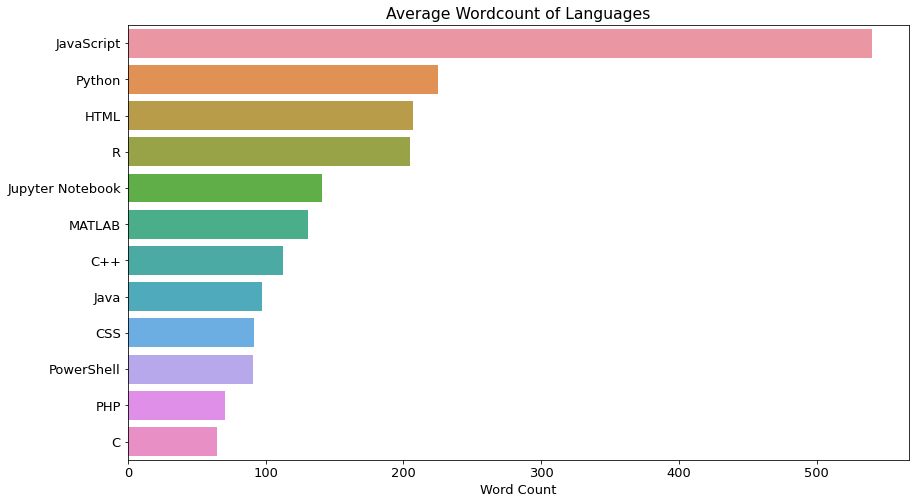

In [61]:
ax = sns.barplot(x=lang_wordcount.values, 
                 y=lang_wordcount.index)
ax.set(title='Average Wordcount of Languages', xlabel='Word Count', 
      ylabel='')
plt.show()

In [62]:
documents = df[['repo','language', 'clean_lemmatized']]
documents_top_4 = top_4_lang_df[['repo','language', 'clean_lemmatized']]
documents_top_4

,repo,language,clean_lemmatized
3,iggisv9t/benzin_gif,Python,benzin_gif create animated gifs look like gaso...
7,madsenmj/ml-gas-price,Jupyter Notebook,gas price prediction model project us public d...
8,tseale/charliehustle,Python,charliehustle python script pulling mlb gameda...
13,abhinav5544/gasolineprice,Jupyter Notebook,gasolineprice project based machine learning t...
14,abuenosvinos/gasolineras-www,JavaScript,proyecto gasolineras authorauthorhttpwwwantoni...
...,...,...,...
401,oganesManasian/solar,Python,solar optimal energy management solarpowered c...
402,rstrigma/solarapp,JavaScript,solarapp change world solar energy two section...
403,juusokorhonen/solartools,Python,solartools tool solving solar energy problem i...
405,sukanyavenkataraman/enerhack,JavaScript,enerhack code communicating energyan dahsboard


# Modeling

## Baseline

In [448]:
documents.language.value_counts()

Jupyter Notebook    67
JavaScript          57
Python              52
PowerShell          36
HTML                30
Java                22
C++                 19
C                   18
PHP                 14
R                   14
MATLAB              13
CSS                 10
Name: language, dtype: int64

In [447]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.7, stratify=y, random_state=42)
y_train = pd.Series(('Jupyter Notebook,' * X_train.shape[0]).split(',')[:-1])

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

1.0
0.1887


In [446]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.7, stratify=y, random_state=42)
y_train = pd.Series(('Jupyter Notebook,' * X_train.shape[0]).split(',')[:-1])

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 8))
print(round(model.score(X_test, y_test), 8))

1.0
0.3125


# Real

## All - TFIDF

In [464]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
model = RandomForestClassifier(max_depth=12, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.7402
0.493


In [469]:
test.head()

,actual,predicted
8,Python,Jupyter Notebook
216,PowerShell,PowerShell
315,Jupyter Notebook,Jupyter Notebook
360,Python,Jupyter Notebook
64,JavaScript,Jupyter Notebook


## Top 4 - TFIDF

In [467]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
model = RandomForestClassifier(max_depth=12, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.9231
0.6047


## All - CountVector

In [243]:
cv = CountVectorizer()
X = cv.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
model = RandomForestClassifier(max_depth=12, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.7082
0.5211


## Top 4 - CountVector

In [271]:
cv = CountVectorizer()
X = cv.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.7692
0.6047


# Using bigrams

In [450]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X = tfidf.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
model = RandomForestClassifier(max_depth=12, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier().fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.4377
0.3521


In [327]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X = tfidf.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
model = RandomForestClassifier(max_depth=12, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.716
0.4186


In [366]:
cv = CountVectorizer(ngram_range=(2, 2))
X = cv.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=12, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.9359
0.3944


In [417]:
cv = CountVectorizer(ngram_range=(2, 2))
X = cv.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size=.8, stratify=y, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=11, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=15, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.9645
0.4884
